<a href="https://colab.research.google.com/github/munawarh/Soil_Moisture_Sensor_Drift/blob/main/Drift_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


# Upload the dataset file
uploaded = files.upload()

Saving mean.csv to mean.csv


In [ ]:
pip install tensorflow==2.11.0  # Use a specific version known to support `tf.keras.wrappers`


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 962.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: keras
    Found existing installation: keras 3.

                         Model       MSE       MAE        R2       MAPE  \
0     Support Vector Regressor  7.306582  2.158458  0.541639  19.961881   
1  Gradient Boosting Regressor  2.688484  1.275269  0.831345  10.490440   

       RMSE  
0  2.703069  
1  1.639660  


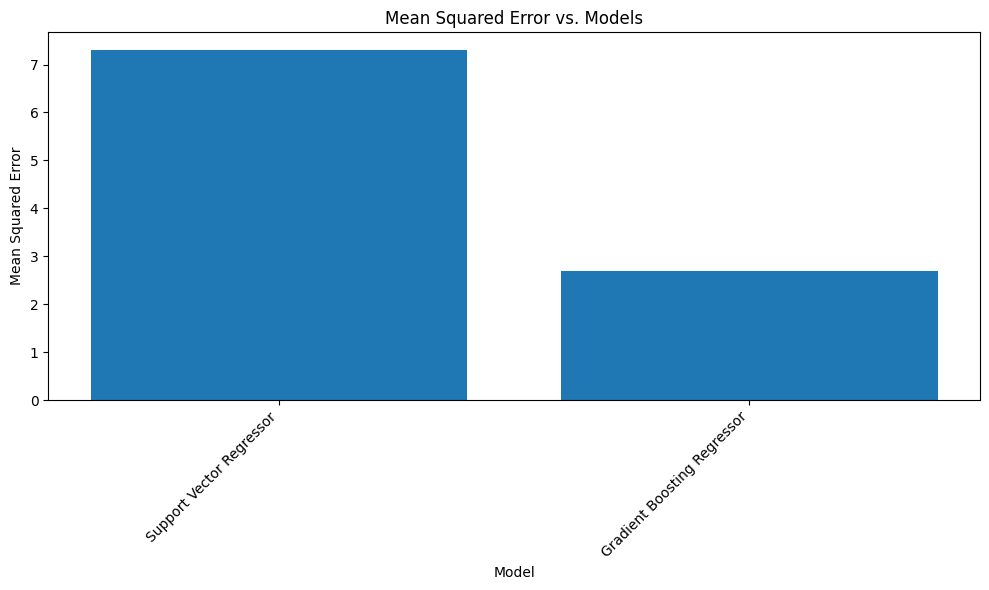

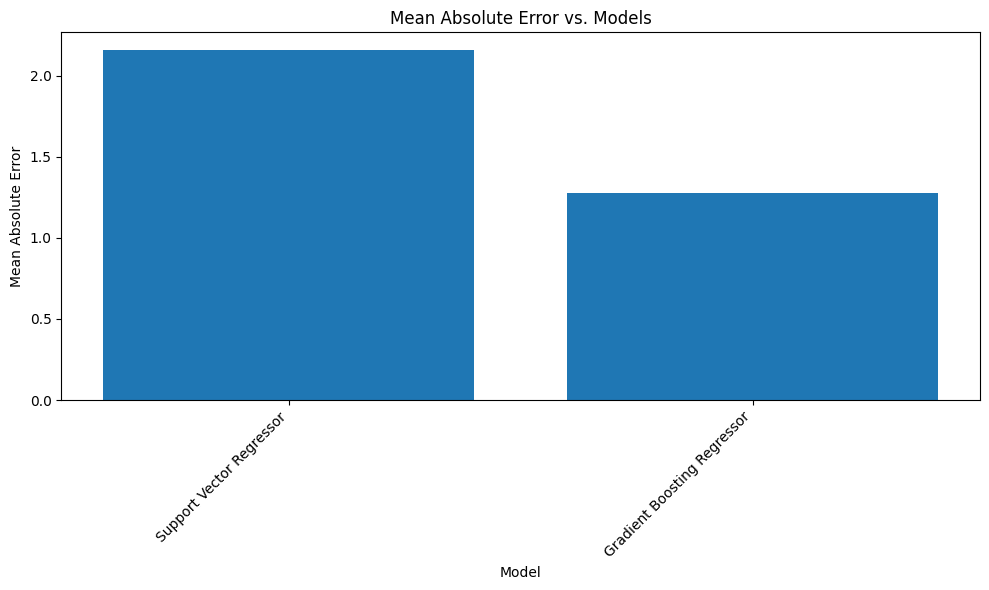

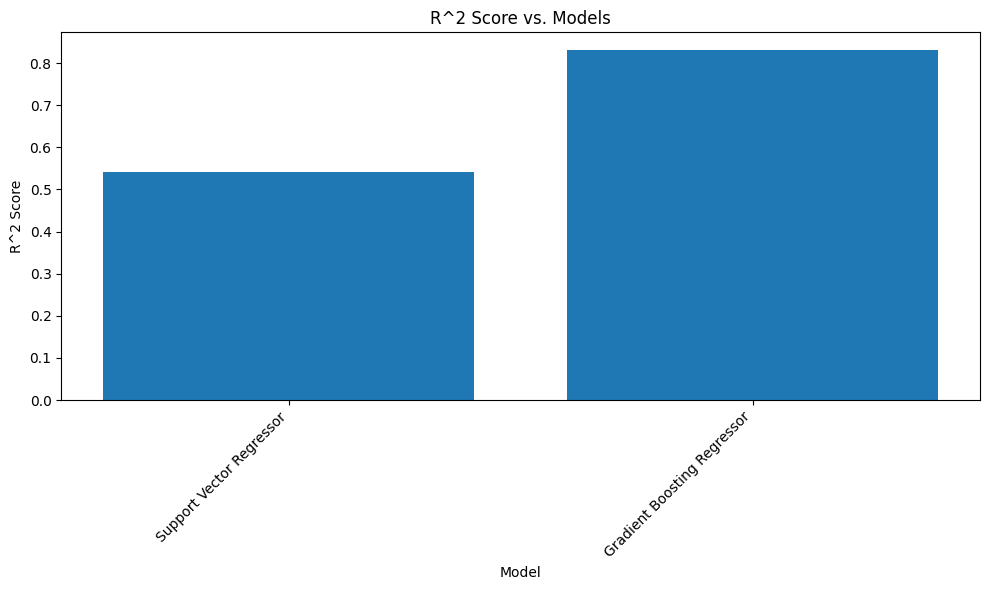

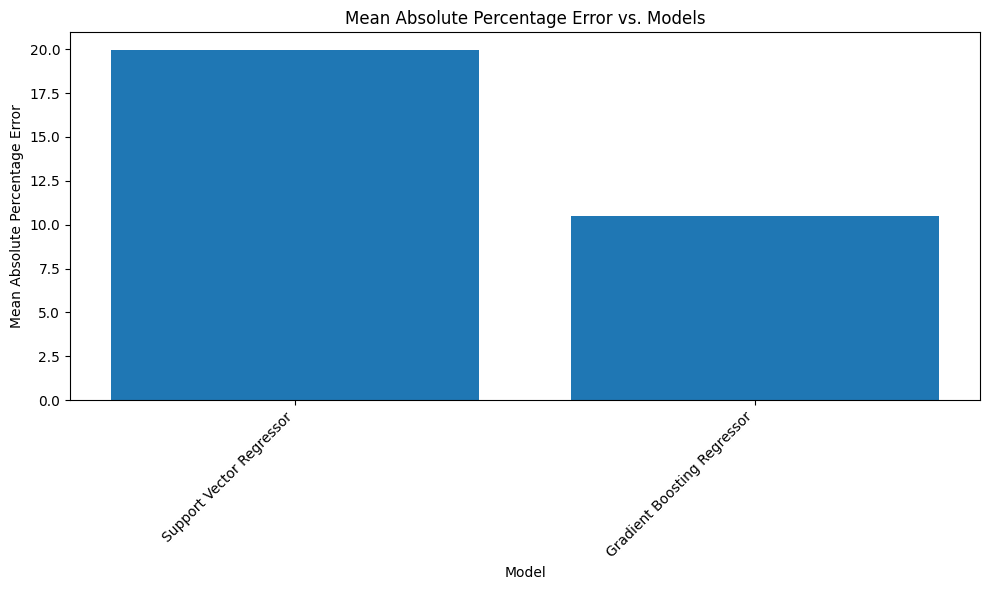

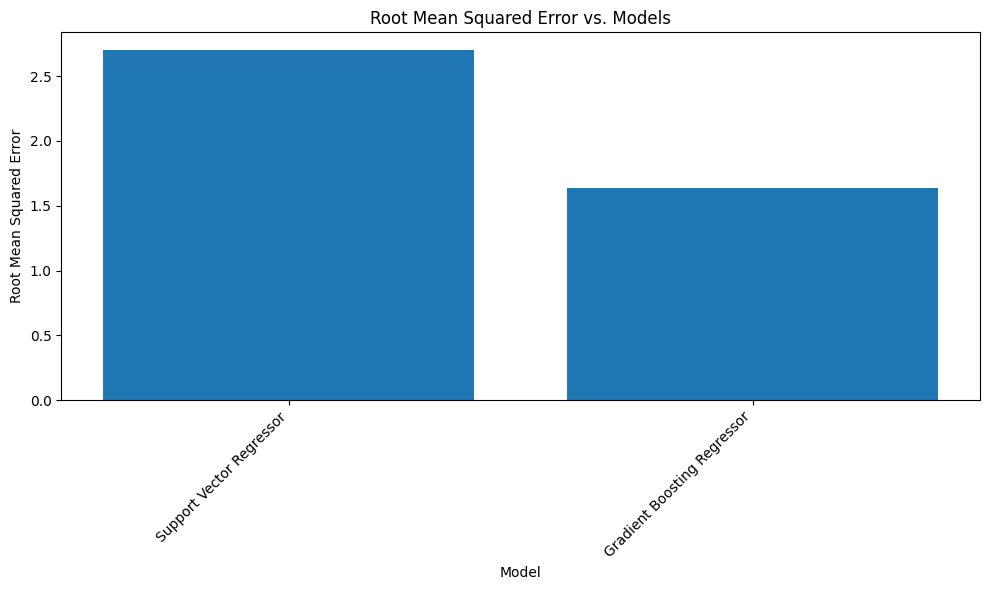

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data
# Assuming you have loaded your data into a DataFrame called 'df'
df = pd.read_csv("RealTime Dataset.csv")
# Extract features and target variable
features = df[['EC', 'PH', 'Temp']]
target = df['D']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize regression models (only SVR and Gradient Boosting Regressor)
models = {
    'Support Vector Regressor': SVR(kernel='linear'),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Create an empty list to store the results
results = []

# Loop through each model, train on the training data, and evaluate on the test data
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rmse = np.sqrt(mse)

    # Store the results in the list
    results.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape,
        'RMSE': rmse
    })

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

# Define the metrics and corresponding labels
metrics = ['MSE', 'MAE', 'R2', 'MAPE', 'RMSE']
metric_labels = ['Mean Squared Error', 'Mean Absolute Error', 'R^2 Score', 'Mean Absolute Percentage Error', 'Root Mean Squared Error']

# Plot each metric against the models
for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Model'], results_df[metric])
    plt.xlabel('Model')
    plt.ylabel(metric_labels[i])
    plt.title(f'{metric_labels[i]} vs. Models')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


                         Model       MSE       MAE        R2       MAPE  \
0     Support Vector Regressor  0.037879  0.142436  0.043453  13.871428   
1  Gradient Boosting Regressor  0.026487  0.113794  0.331134  11.482634   

       RMSE  
0  0.194626  
1  0.162749  


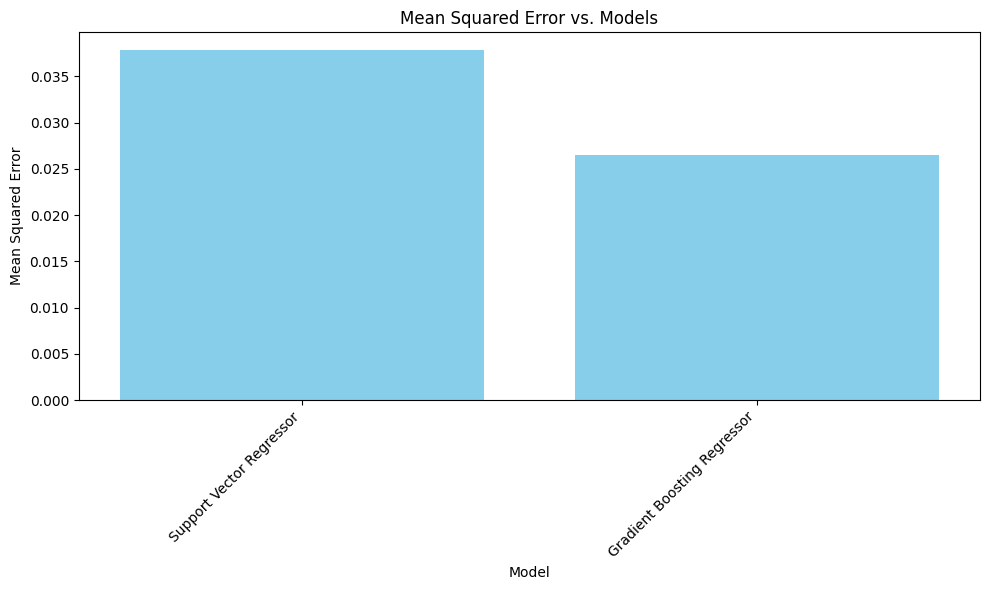

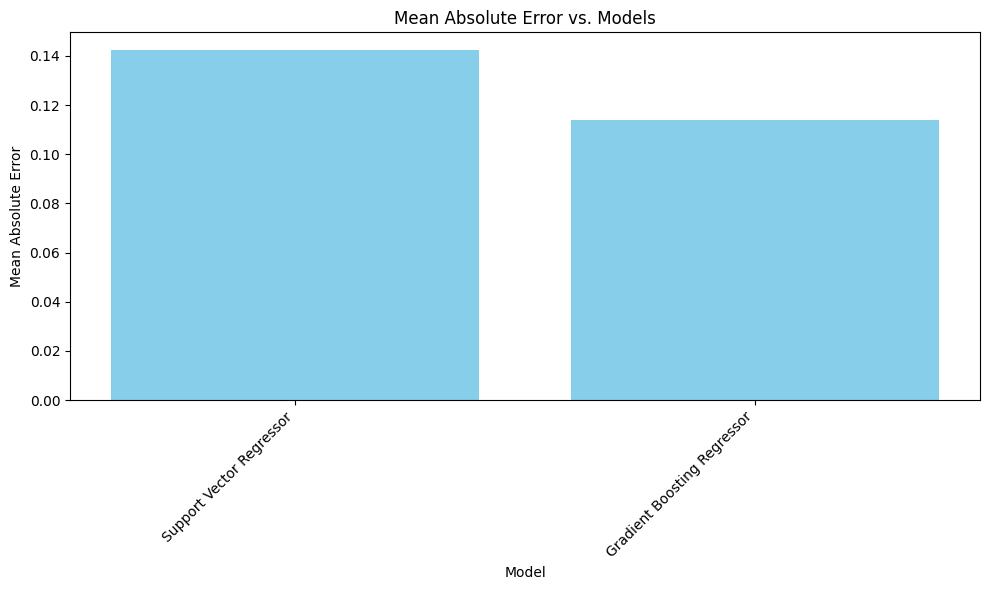

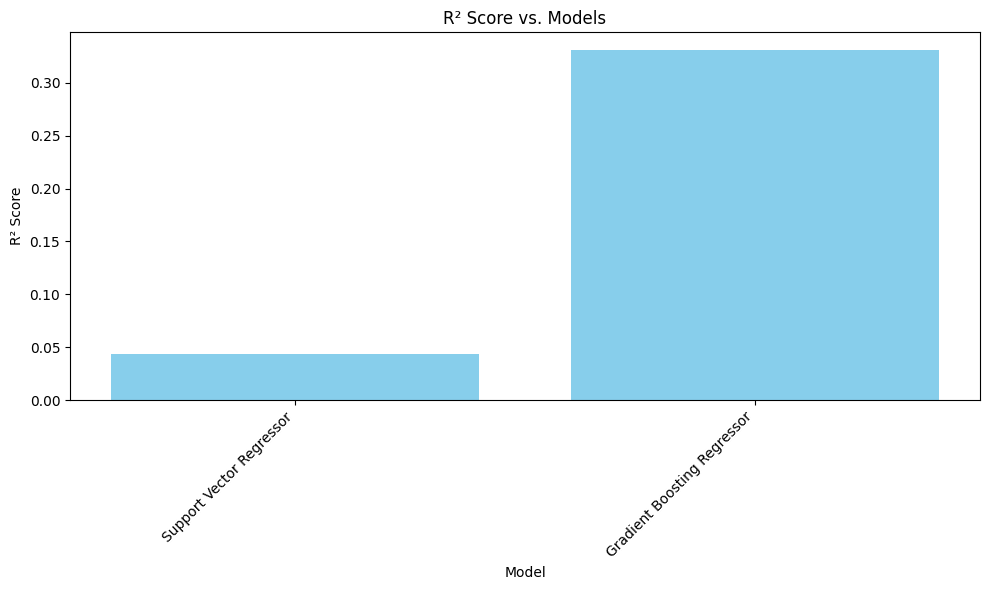

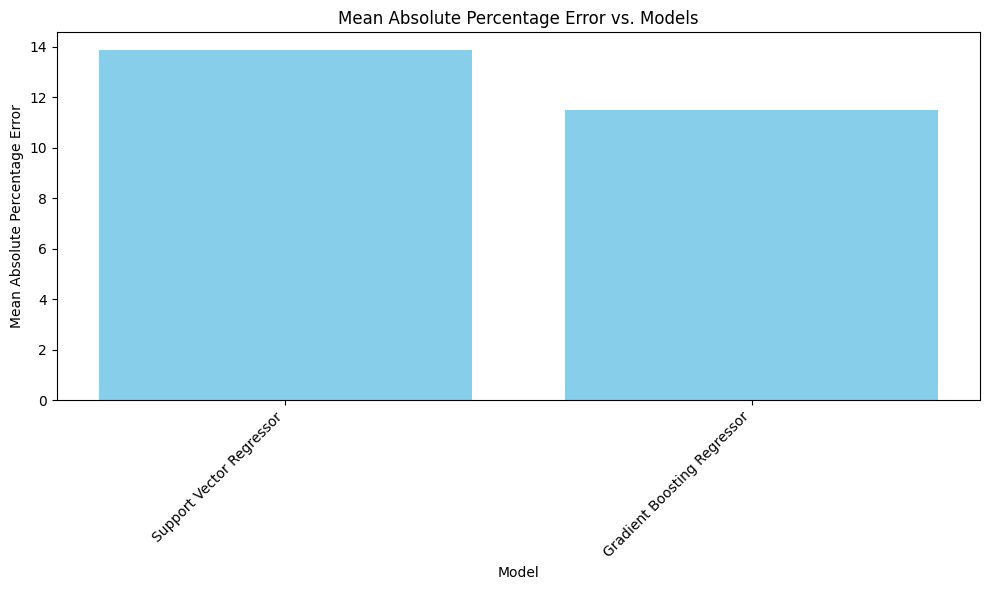

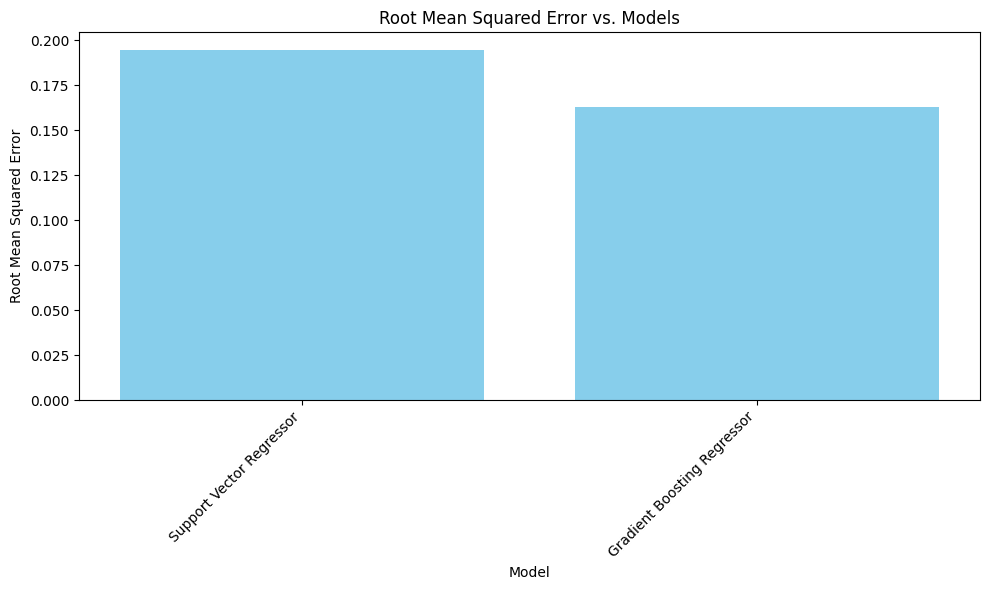

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("RealTime Dataset.csv")

# Extract features and target variable
features = df[['EC', 'pH', 'temp']]
target = df['Act_Drift']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize regression models
models = {
    'Support Vector Regressor': SVR(kernel='linear'),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Store results
results = []

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rmse = np.sqrt(mse)

    results.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape,
        'RMSE': rmse
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot performance metrics
metrics = ['MSE', 'MAE', 'R2', 'MAPE', 'RMSE']
metric_labels = ['Mean Squared Error', 'Mean Absolute Error', 'R² Score', 'Mean Absolute Percentage Error', 'Root Mean Squared Error']

for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Model'], results_df[metric], color='skyblue')
    plt.xlabel('Model')
    plt.ylabel(metric_labels[i])
    plt.title(f'{metric_labels[i]} vs. Models')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data
# Assuming you have loaded your data into a DataFrame called 'df'
df = pd.read_csv("dataset.csv")
# Extract features and target variable
features = df[['EC', 'PH', 'Temp']]
target = df['D']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize regression models (only SVR and Gradient Boosting Regressor)
models = {
    'Support Vector Regressor': SVR(kernel='linear'),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Create an empty list to store the results
results = []

# Loop through each model, train on the training data, and evaluate on the test data
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rmse = np.sqrt(mse)

    # Store the results in the list
    results.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape,
        'RMSE': rmse
    })

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

# Define the metrics and corresponding labels
metrics = ['MSE', 'MAE', 'R2', 'MAPE', 'RMSE']
metric_labels = ['Mean Squared Error', 'Mean Absolute Error', 'R^2 Score', 'Mean Absolute Percentage Error', 'Root Mean Squared Error']

# Plot each metric against the models
for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Model'], results_df[metric])
    plt.xlabel('Model')
    plt.ylabel(metric_labels[i])
    plt.title(f'{metric_labels[i]} vs. Models')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


<ipython-input-2-a7f257f2f008>:62: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'LSTM': KerasRegressor(build_fn=create_lstm_model, epochs=50, batch_size=32, verbose=0),
<ipython-input-2-a7f257f2f008>:63: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'ANN': KerasRegressor(build_fn=create_complex_model, epochs=50, batch_size=32, verbose=0)



Metrics for LSTM:
      Metric  Training Set   Test Set
0  R-squared      0.804807   0.806969
1        MSE      2.997130   2.977949
2        MAE      1.363079   1.357245
3       RMSE      1.731222   1.725673
4       MAPE     11.319711  11.244164


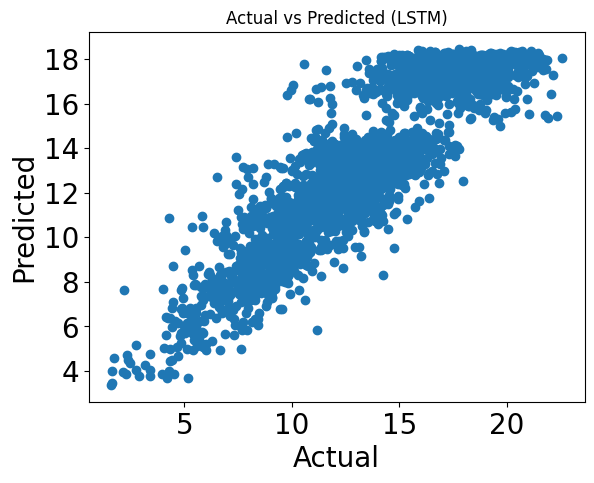


Metrics for ANN:
      Metric  Training Set   Test Set
0  R-squared      0.805962   0.809993
1        MSE      2.979385   2.931297
2        MAE      1.353792   1.341602
3       RMSE      1.726089   1.712103
4       MAPE     11.253785  11.116682


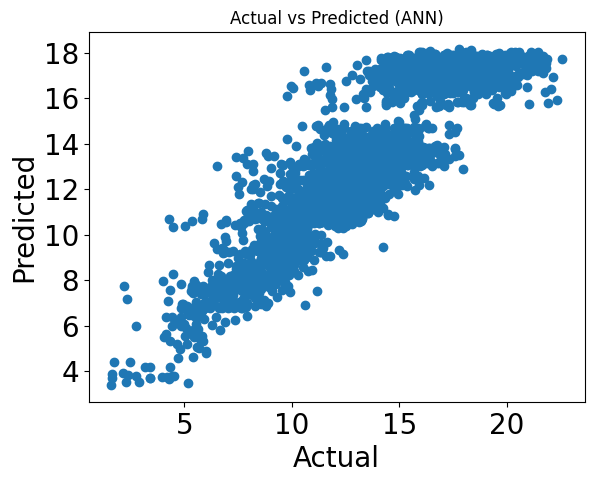

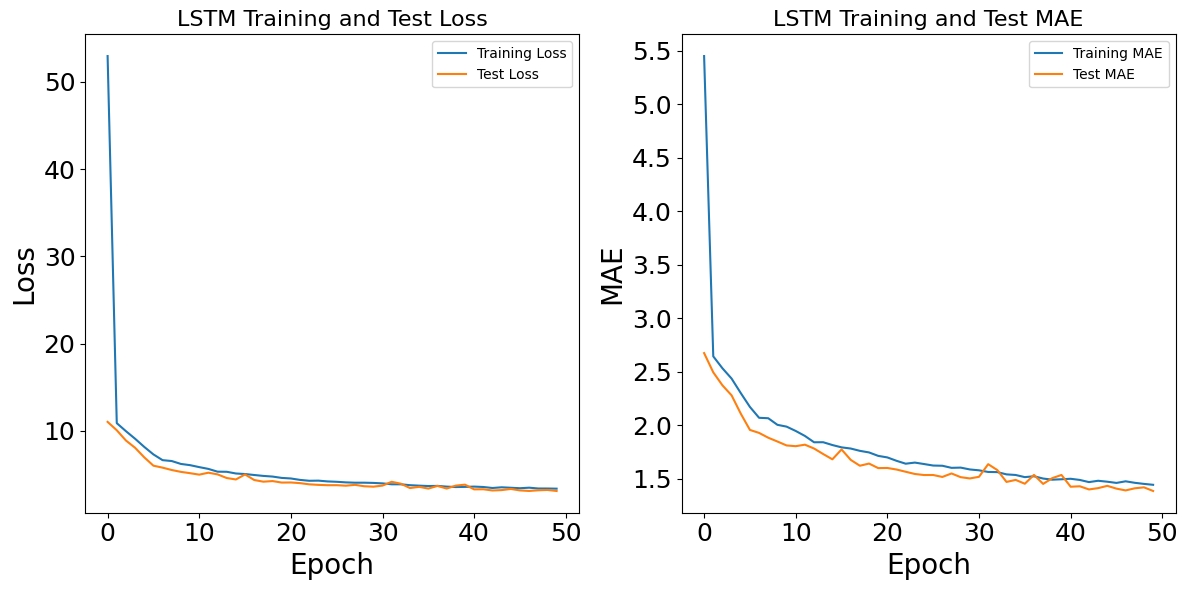

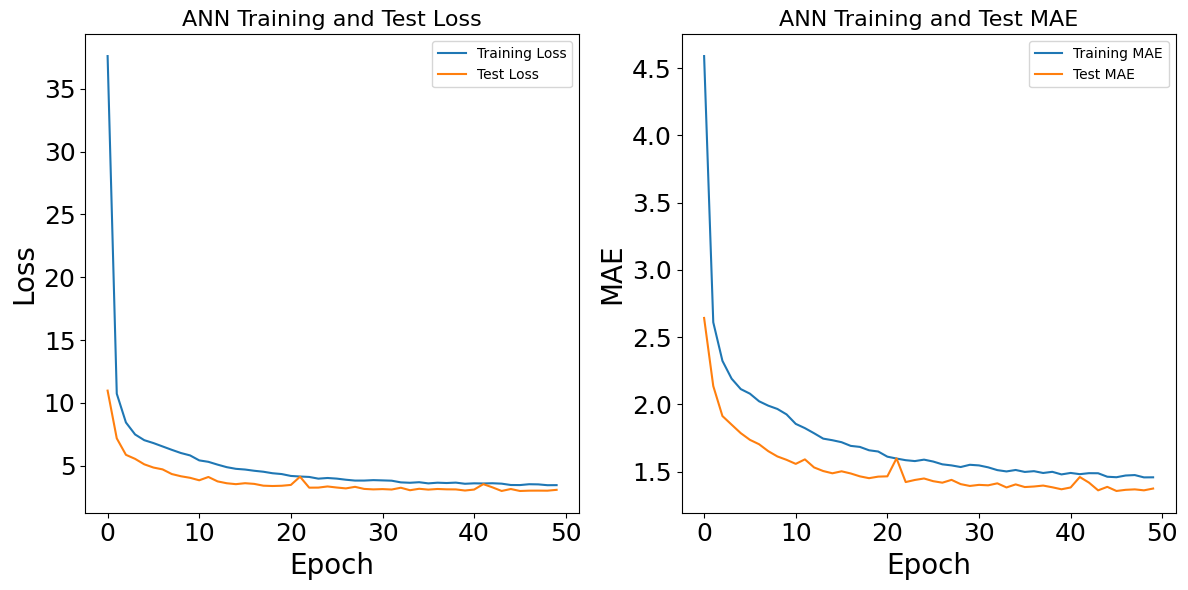

In [ ]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


# Load the dataset into a DataFrame
df = pd.read_csv("sample_data (18).csv")

# Display the DataFrame
df

# Extract features and target variable
features = df[['EC', 'PH', 'Temp']]
target = df['D']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM (adding a dimension for time steps)
X_train_scaled_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define an LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(X_train_scaled_lstm.shape[1], 1), return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Define a more complex deep learning model
def create_complex_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Initialize the models
models = {
    'LSTM': KerasRegressor(build_fn=create_lstm_model, epochs=50, batch_size=32, verbose=0),
    'ANN': KerasRegressor(build_fn=create_complex_model, epochs=50, batch_size=32, verbose=0)
}

# Evaluate and plot for each model
for model_name, model in models.items():
    # Use reshaped data for LSTM
    if model_name == 'LSTM':
        model.fit(X_train_scaled_lstm, y_train)
        y_pred_train = model.predict(X_train_scaled_lstm)
        y_pred_test = model.predict(X_test_scaled_lstm)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

    # Calculate metrics for training set
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

    # Calculate metrics for test set
    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

    # Display metrics
    metrics_df = pd.DataFrame({
        'Metric': ['R-squared', 'MSE', 'MAE', 'RMSE', 'MAPE'],
        'Training Set': [r2_train, mse_train, mae_train, rmse_train, mape_train],
        'Test Set': [r2_test, mse_test, mae_test, rmse_test, mape_test]
    })

    print(f"\nMetrics for {model_name}:\n{metrics_df}")

    # Plot actual vs predicted
    plt.scatter(y_test, y_pred_test)
    plt.title(f'Actual vs Predicted ({model_name})')
    plt.xlabel('Actual', fontsize=20)
    plt.ylabel('Predicted', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

# Plot loss for each model
for model_name, model in models.items():
    # Use reshaped data for LSTM
    if model_name == 'LSTM':
        history = model.fit(X_train_scaled_lstm, y_train, validation_data=(X_test_scaled_lstm, y_test), epochs=50, batch_size=32, verbose=0)
    else:
        history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=0)

    # Plot training and validation loss
    plt.figure(figsize=(12, 6))

    # Plot Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} Training and Test Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.legend()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # Plot additional metrics
    plt.subplot(1, 2, 2)
    if 'mae' in history.history:
        plt.plot(history.history['mae'], label='Training MAE')
        plt.plot(history.history['val_mae'], label='Test MAE')
        plt.title(f'{model_name} Training and Test MAE', fontsize=16)
        plt.xlabel('Epoch', fontsize=20)
        plt.ylabel('MAE', fontsize=20)
        plt.legend()
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)

    plt.tight_layout()
    plt.show()


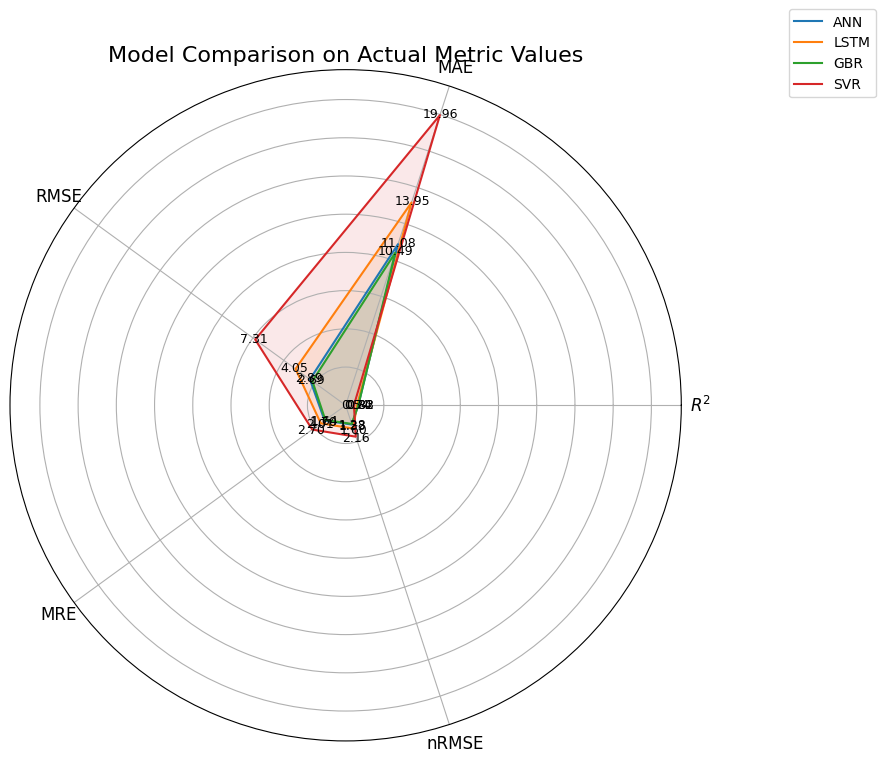

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metric names
labels = ['$R^2$', 'MAE', 'RMSE', 'MRE', 'nRMSE']

# Actual metric values for each model
data = {
    'ANN': [0.82, 11.08, 2.89, 1.70, 1.326],
    'LSTM': [0.74, 13.95, 4.05, 2.01, 1.600],
    'GBR': [0.83, 10.49, 2.69, 1.64, 1.280],
    'SVR': [0.54, 19.96, 7.31, 2.70, 2.160]
}

# Radar plot setup
labels_count = len(labels)
angles = np.linspace(0, 2 * np.pi, labels_count, endpoint=False).tolist()
angles += angles[:1]  # close the radar chart

# Prepare figure
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Plot each model
for model, metrics in data.items():
    values = metrics + [metrics[0]]  # close the loop
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

    # Add value annotations
    for i, val in enumerate(metrics):
        angle = angles[i]
        ax.text(angle, val + 0.1, f"{val:.2f}", fontsize=9, ha='center', va='center')

# Set axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)

# Set radial limits smartly for clarity
all_values = [val for model_vals in data.values() for val in model_vals]
ax.set_ylim(0, max(all_values) * 1.1)

# Hide ytick labels
ax.set_yticklabels([])

# Title and legend
ax.set_title("Model Comparison on Actual Metric Values", size=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


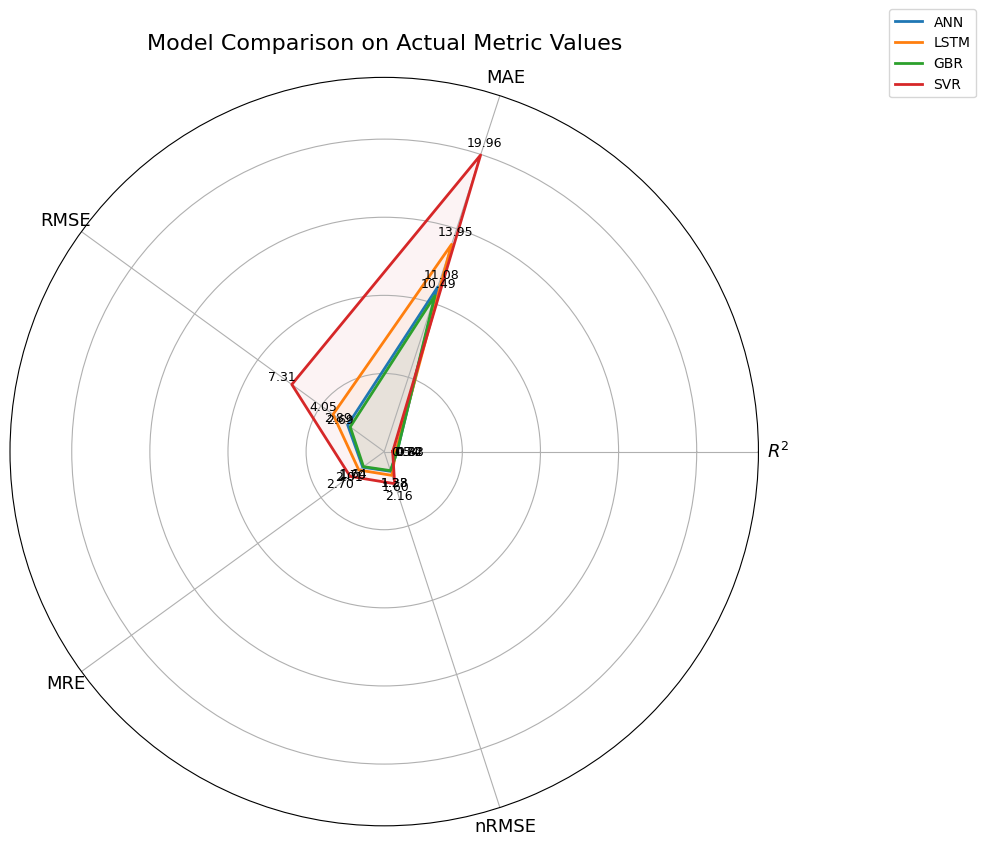

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metric names
labels = ['$R^2$', 'MAE', 'RMSE', 'MRE', 'nRMSE']

# Actual metric values for each model
data = {
    'ANN': [0.82, 11.08, 2.89, 1.70, 1.326],
    'LSTM': [0.74, 13.95, 4.05, 2.01, 1.600],
    'GBR': [0.83, 10.49, 2.69, 1.64, 1.280],
    'SVR': [0.54, 19.96, 7.31, 2.70, 2.160]
}

# Setup
num_labels = len(labels)
angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Create figure
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Find max for radial limit
all_values = [val for values in data.values() for val in values]
max_val = max(all_values)
ax.set_ylim(0, max_val * 1.2)

# Plot each model
for model, values in data.items():
    stats = values + [values[0]]
    ax.plot(angles, stats, label=model, linewidth=2)
    ax.fill(angles, stats, alpha=0.05)

    # Annotate values (with dynamic offset)
    for i, val in enumerate(values):
        angle = angles[i]
        offset = max_val * 0.04  # dynamic padding
        x = angle
        y = val + offset
        ha = 'left' if np.pi/2 < angle < 3*np.pi/2 else 'right'
        ax.text(x, y, f'{val:.2f}', fontsize=9, ha='center', va='center')

# Axis setup
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=13)
ax.set_yticklabels([])

# Final touches
ax.set_title("Model Comparison on Actual Metric Values", size=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


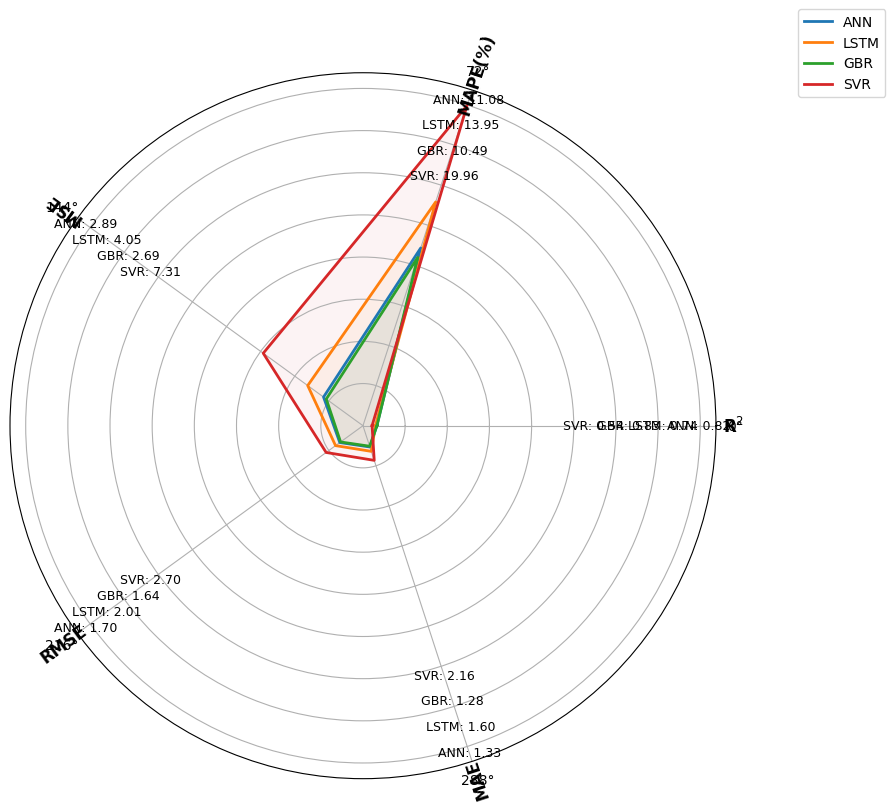

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Test data only
data = {
    'ANN': [0.82, 11.08, 2.89, 1.70, 1.326],
    'LSTM': [0.74, 13.95, 4.05, 2.01, 1.600],
    'GBR': [0.83, 10.49, 2.69, 1.64, 1.280],
    'SVR': [0.54, 19.96, 7.31, 2.70, 2.160]
}
labels = ['R$^2$', 'MAPE(%)', 'MSE', 'RMSE', 'MAE']

# Setup
num_metrics = len(labels)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Get global max for spacing
all_values = [v for values in data.values() for v in values]
max_val = max(all_values)
label_offset = max_val * 1.1
score_step = max_val * 0.08
extra_spacing = 1.3

# Plot each model
for model, values in data.items():
    stats = values + [values[0]]
    ax.plot(angles, stats, label=model, linewidth=2)
    ax.fill(angles, stats, alpha=0.05)

# Hide radial ticks
ax.set_yticklabels([])

# Set axis ticks (rotated)
ax.set_xticks(angles[:-1])
for i, angle in enumerate(angles[:-1]):
    # Rotation logic
    angle_deg = np.degrees(angle)
    rotation = angle_deg if angle_deg <= 180 else angle_deg - 180

    # Draw rotated label
    ax.text(
        angle,
        label_offset,
        labels[i],
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold',
        rotation=rotation,
        rotation_mode='anchor'
    )

    # Score labels
    factor = extra_spacing if i == 0 else 1.0  # More spacing for R^2
    for j, (model, values) in enumerate(data.items()):
        offset = label_offset - factor * (j + 1) * score_step
        ax.text(angle, offset, f"{model}: {values[i]:.2f}", ha='center', va='center', fontsize=9)

# Final touches
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))
plt.tight_layout()
plt.show()


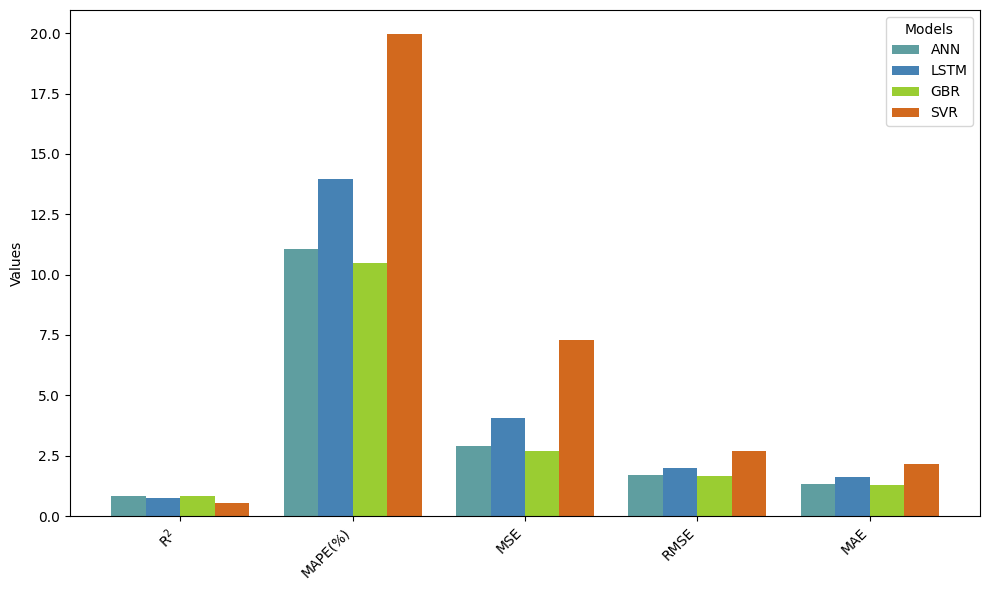

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Test data
data = {
    'ANN': [0.82, 11.08, 2.89, 1.70, 1.326],
    'LSTM': [0.74, 13.95, 4.05, 2.01, 1.600],
    'GBR': [0.83, 10.49, 2.69, 1.64, 1.280],
    'SVR': [0.54, 19.96, 7.31, 2.70, 2.160]
}
labels = ['R$^2$', 'MAPE(%)', 'MSE', 'RMSE', 'MAE']

# Number of models and metrics
num_models = len(data)
num_metrics = len(labels)

# Position of the bars
x = np.arange(num_metrics)  # Metric positions
width = 0.2  # Width of each bar

# Define slightly darker, professional colors for the models
dark_colors = ['#5F9EA0', '#4682B4', '#9ACD32', '#D2691E']

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each model
for i, (model, values) in enumerate(data.items()):
    ax.bar(x + i * width, values, width, label=model, color=dark_colors[i])

# Set labels and title
ax.set_xticks(x + width * (num_models - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylabel('Values')
#ax.set_title('Comparison of Metrics Across Models')
ax.legend(title='Models')

# Display the plot
plt.tight_layout()
plt.show()


Text(5.026548245743669, 20.958000000000002, 'nRMSE')

Regression Metrics for GBR:
MSE: 0.0265
MAE: 0.1138
R^2: 0.3311
MAPE: 11.4826%
RMSE: 0.1627
Mean Difference: 0.1138


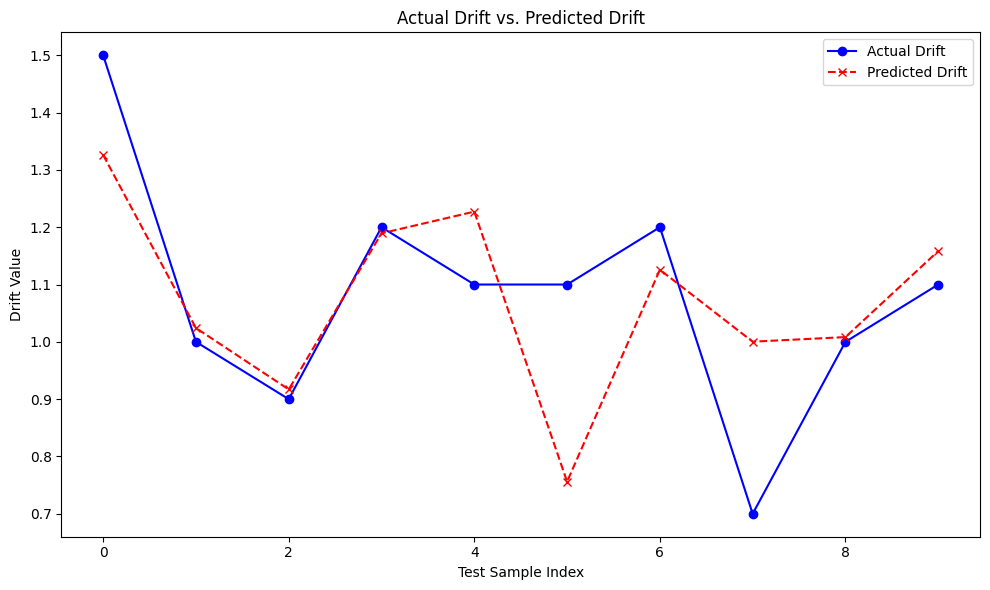

   Actual Drift  Predicted Drift  Difference
0           1.5         1.326062    0.173938
1           1.0         1.024134    0.024134
2           0.9         0.916972    0.016972
3           1.2         1.189403    0.010597
4           1.1         1.227189    0.127189

Calculated Mean Difference: 0.1138


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("mean.csv")

# Extract features and target variable
features = df[['EC', 'pH', 'temp']]  # Adjust as needed for your feature columns
target = df['Act_Drift']  # Target variable for actual drift

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the GBR model
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)

# Calculate the mean difference (mean of the absolute differences between actual and predicted)
mean_difference = np.mean(np.abs(y_test - y_pred))

# Print the regression metrics
print("Regression Metrics for GBR:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"RMSE: {rmse:.4f}")
print(f"Mean Difference: {mean_difference:.4f}")

# Visualizing the actual vs predicted drift
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Drift', color='blue', marker='o')
plt.plot(y_pred, label='Predicted Drift', color='red', linestyle='--', marker='x')
plt.xlabel('Test Sample Index')
plt.ylabel('Drift Value')
plt.title('Actual Drift vs. Predicted Drift')
plt.legend()
plt.tight_layout()
plt.show()

# Now, you can show the mean difference calculation step by step
# Let's print out some sample values
sample_comparison = pd.DataFrame({'Actual Drift': y_test.values, 'Predicted Drift': y_pred})
sample_comparison['Difference'] = np.abs(sample_comparison['Actual Drift'] - sample_comparison['Predicted Drift'])

# Displaying the first few rows of the sample comparison
print(sample_comparison.head())

# Finally, calculating the mean of the differences
mean_difference_step = sample_comparison['Difference'].mean()
print(f"\nCalculated Mean Difference: {mean_difference_step:.4f}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "RealTime Dataset.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Extract the relevant columns
gravimetric_soil_moisture = df['Gravimetric Soil Moisture (%)']
sensor_soil_moisture = df['Sensor Soil Moisture (%)']

# Calculate the average and difference
average = (gravimetric_soil_moisture + sensor_soil_moisture) / 2
difference = gravimetric_soil_moisture - sensor_soil_moisture  # Gravimetric - Sensor

# Calculate mean and limits of agreement (LOA)
mean_diff = np.mean(difference)
std_diff = np.std(difference, ddof=1)  # Use ddof=1 for sample standard deviation
loa_upper = mean_diff + 1.96 * std_diff  # Upper limit of agreement
loa_lower = mean_diff - 1.96 * std_diff  # Lower limit of agreement

# Create Bland-Altman plot
plt.figure(figsize=(8, 6))
plt.scatter(average, difference, color='blue', edgecolors='black', alpha=0.7, label='Data Points')
plt.axhline(mean_diff, color='red', linestyle='--', label=f'Mean Diff: {mean_diff:.2f}')
plt.axhline(loa_upper, color='green', linestyle='--', label=f'+1.96 SD: {loa_upper:.2f}')
plt.axhline(loa_lower, color='green', linestyle='--', label=f'-1.96 SD: {loa_lower:.2f}')

# Labels and title
plt.xlabel('Average of Gravimetric and Sensor Measurements (%)')
plt.ylabel('Difference (Gravimetric - Sensor) (%)')
plt.title('Bland-Altman Plot for Soil Moisture Measurements')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "RealTime Dataset.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Extract the relevant columns
gravimetric_soil_moisture = df['Gravimetric Soil Moisture (%)']
corrected_soil_moisture = df['Corrected Soil Moisture (%)']

# Calculate the average and difference
average = (gravimetric_soil_moisture + corrected_soil_moisture) / 2
difference = gravimetric_soil_moisture - corrected_soil_moisture  # Gravimetric - Corrected

# Calculate mean difference and limits of agreement (LOA)
mean_diff = np.mean(difference)
std_diff = np.std(difference, ddof=1)  # Use ddof=1 for sample standard deviation
loa_upper = mean_diff + 1.96 * std_diff  # Upper limit of agreement
loa_lower = mean_diff - 1.96 * std_diff  # Lower limit of agreement

# Create Bland-Altman plot
plt.figure(figsize=(8, 6))
plt.scatter(average, difference, color='blue', edgecolors='black', alpha=0.7, label='Data Points')
plt.axhline(mean_diff, color='red', linestyle='--', label=f'Mean Diff: {mean_diff:.2f}')
plt.axhline(loa_upper, color='green', linestyle='--', label=f'+1.96 SD: {loa_upper:.2f}')
plt.axhline(loa_lower, color='green', linestyle='--', label=f'-1.96 SD: {loa_lower:.2f}')

# Labels and title
plt.xlabel('Average of Gravimetric and Corrected Measurements (%)')
plt.ylabel('Difference (Gravimetric - Corrected) (%)')
plt.title('Bland-Altman Plot for Soil Moisture Measurements')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()


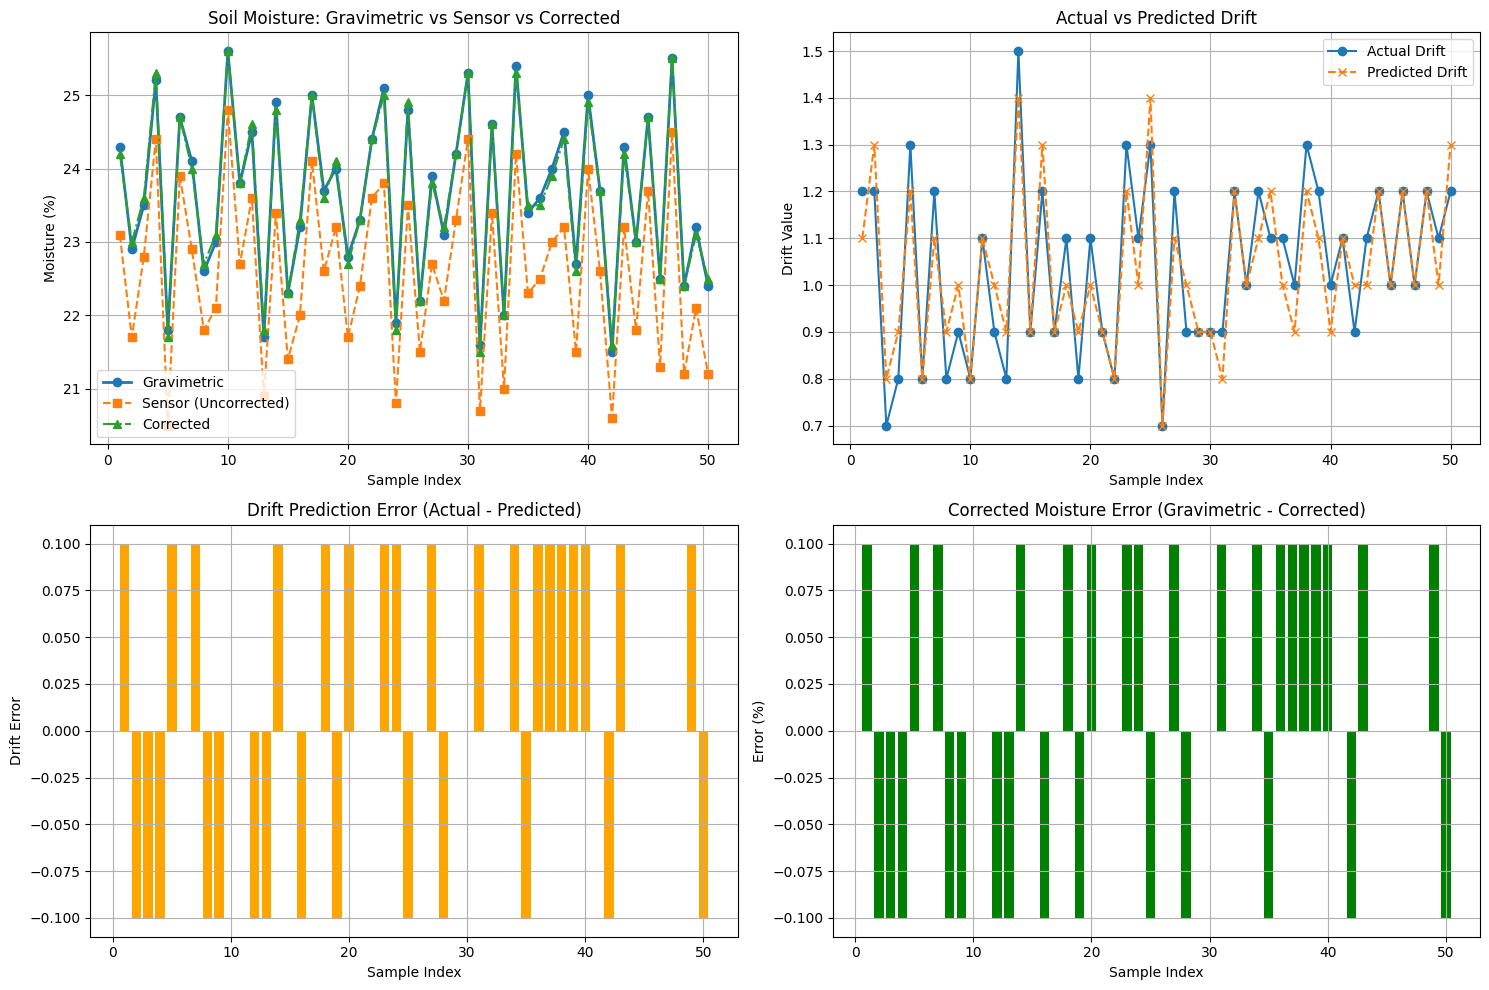

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("RealTime Dataset.csv")

# Rename columns for easier access (modify if your actual column names differ)
df.columns = df.columns.str.strip()  # Remove whitespace

# Extract required columns
samples = df["Observation"]
gravimetric = df["Gravimetric Soil Moisture (%)"]
sensor = df["Sensor Soil Moisture (%)"]
corrected = df["Corrected Soil Moisture (%)"]
actual_drift = df["Act_Drift"]
predicted_drift = df["Pre_Drift"]

# Compute errors
drift_error = actual_drift - predicted_drift
moisture_error = gravimetric - corrected

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Moisture comparison
axs[0, 0].plot(samples, gravimetric, label='Gravimetric', marker='o', linewidth=2)
axs[0, 0].plot(samples, sensor, label='Sensor (Uncorrected)', marker='s', linestyle='--')
axs[0, 0].plot(samples, corrected, label='Corrected', marker='^', linestyle='-.')
axs[0, 0].set_title('Soil Moisture: Gravimetric vs Sensor vs Corrected')
axs[0, 0].set_xlabel('Sample Index')
axs[0, 0].set_ylabel('Moisture (%)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2: Actual vs Predicted Drift
axs[0, 1].plot(samples, actual_drift, label='Actual Drift', marker='o')
axs[0, 1].plot(samples, predicted_drift, label='Predicted Drift', marker='x', linestyle='--')
axs[0, 1].set_title('Actual vs Predicted Drift')
axs[0, 1].set_xlabel('Sample Index')
axs[0, 1].set_ylabel('Drift Value')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot 3: Drift Error
axs[1, 0].bar(samples, drift_error, color='orange')
axs[1, 0].set_title('Drift Prediction Error (Actual - Predicted)')
axs[1, 0].set_xlabel('Sample Index')
axs[1, 0].set_ylabel('Drift Error')
axs[1, 0].grid(True)

# Plot 4: Corrected Moisture Error
axs[1, 1].bar(samples, moisture_error, color='green')
axs[1, 1].set_title('Corrected Moisture Error (Gravimetric - Corrected)')
axs[1, 1].set_xlabel('Sample Index')
axs[1, 1].set_ylabel('Error (%)')
axs[1, 1].grid(True)

# Layout adjustment
plt.tight_layout()
plt.show()


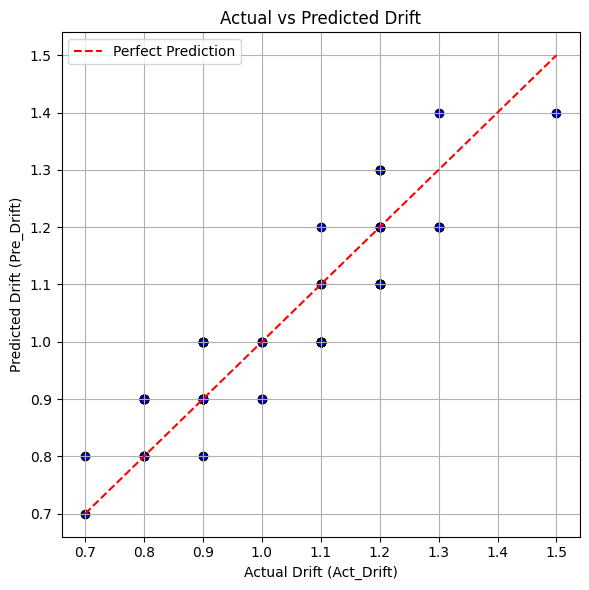

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(df["Act_Drift"], df["Pre_Drift"], color='blue', edgecolor='black')
plt.plot([df["Act_Drift"].min(), df["Act_Drift"].max()],
         [df["Act_Drift"].min(), df["Act_Drift"].max()], 'r--', label='Perfect Prediction')
plt.title("Actual vs Predicted Drift")
plt.xlabel("Actual Drift (Act_Drift)")
plt.ylabel("Predicted Drift (Pre_Drift)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


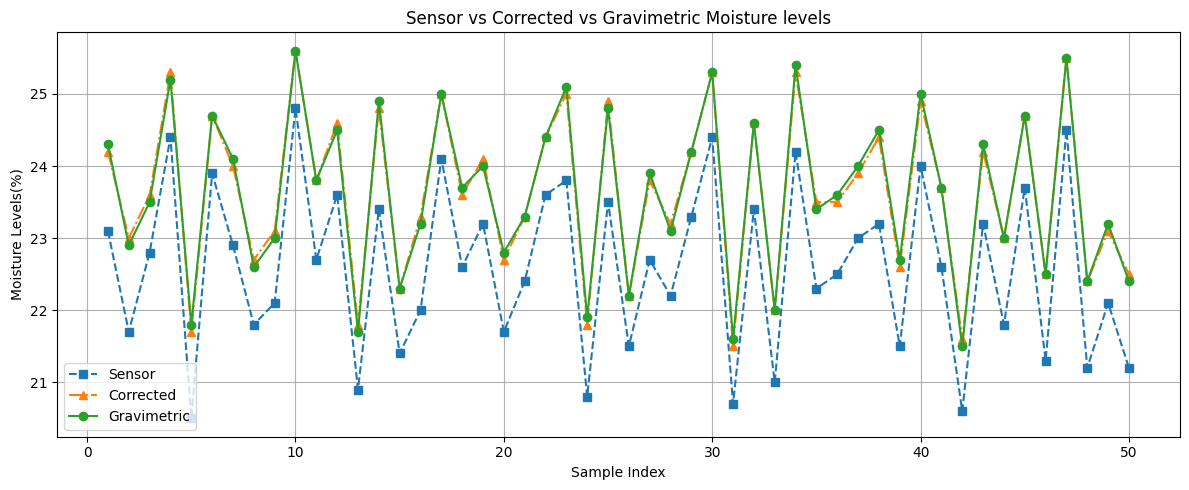

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df["Observation"], df["Sensor Soil Moisture (%)"], label="Sensor", linestyle="--", marker="s")
plt.plot(df["Observation"], df["Corrected Soil Moisture (%)"], label="Corrected", linestyle="-.", marker="^")
plt.plot(df["Observation"], df["Gravimetric Soil Moisture (%)"], label="Gravimetric", marker="o")
plt.title("Sensor vs Corrected vs Gravimetric Moisture levels")
plt.xlabel("Sample Index")
plt.ylabel("Moisture Levels(%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 91%|==================  | 2727/3000 [00:12<00:01]       

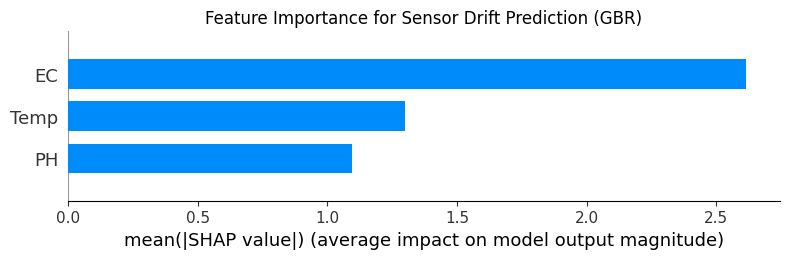

In [2]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load your data
df = pd.read_csv("dataset-Copy.csv")
X = df[['EC', 'PH', 'Temp']]
y = df['D']  # Prediction target: Sensor Drift

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)

# SHAP analysis for GBR
explainer = shap.Explainer(gbr_model, X_train)
shap_values = explainer(X_test)

# SHAP summary plot (bar plot)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Feature Importance for Sensor Drift Prediction (GBR)")
plt.xlabel("mean(|SHAP value|) (average impact on model output magnitude)")
plt.tight_layout()
plt.show()
